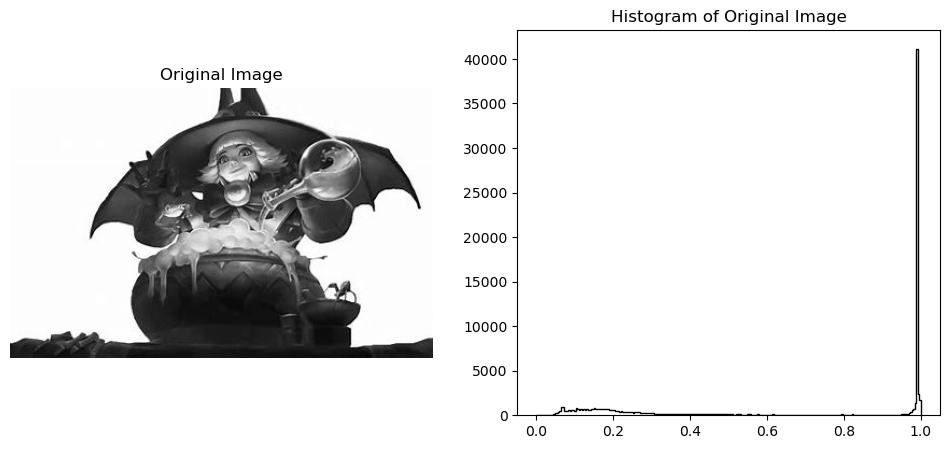

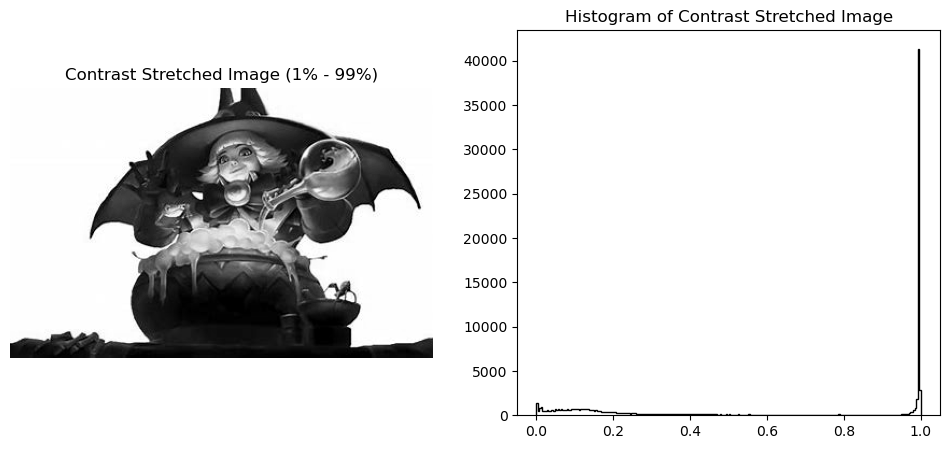

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure

# Mengganti 'image_path' dengan path dari gambar yang Anda unggah
image = io.imread('image1.jpeg', as_gray=True)  # Pastikan gambar dalam grayscale

# Menampilkan citra asli
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Menampilkan histogram citra asli
ax[1].hist(image.ravel(), bins=256, histtype='step', color='black')
ax[1].set_title('Histogram of Original Image')

plt.show()

# Implementasi peregangan kontras dengan persentil yang lebih kecil (1% dan 99%)
p1, p99 = np.percentile(image, (1, 99))  # Menentukan rmin dan rmax
image_rescale = exposure.rescale_intensity(image, in_range=(p1, p99))  # Peregangan kontras

# Menampilkan citra hasil peregangan kontras
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(image_rescale, cmap='gray')
ax[0].set_title('Contrast Stretched Image (1% - 99%)')
ax[0].axis('off')

# Menampilkan histogram citra hasil peregangan
ax[1].hist(image_rescale.ravel(), bins=256, histtype='step', color='black')
ax[1].set_title('Histogram of Contrast Stretched Image')

plt.show()


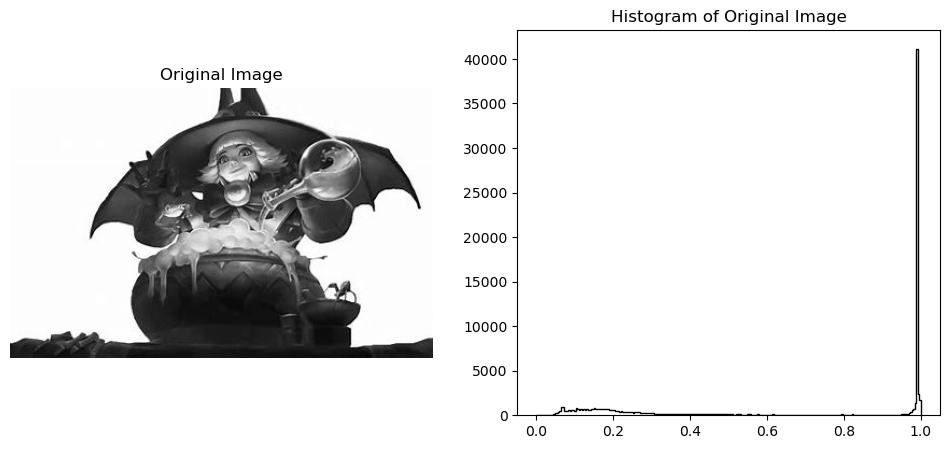

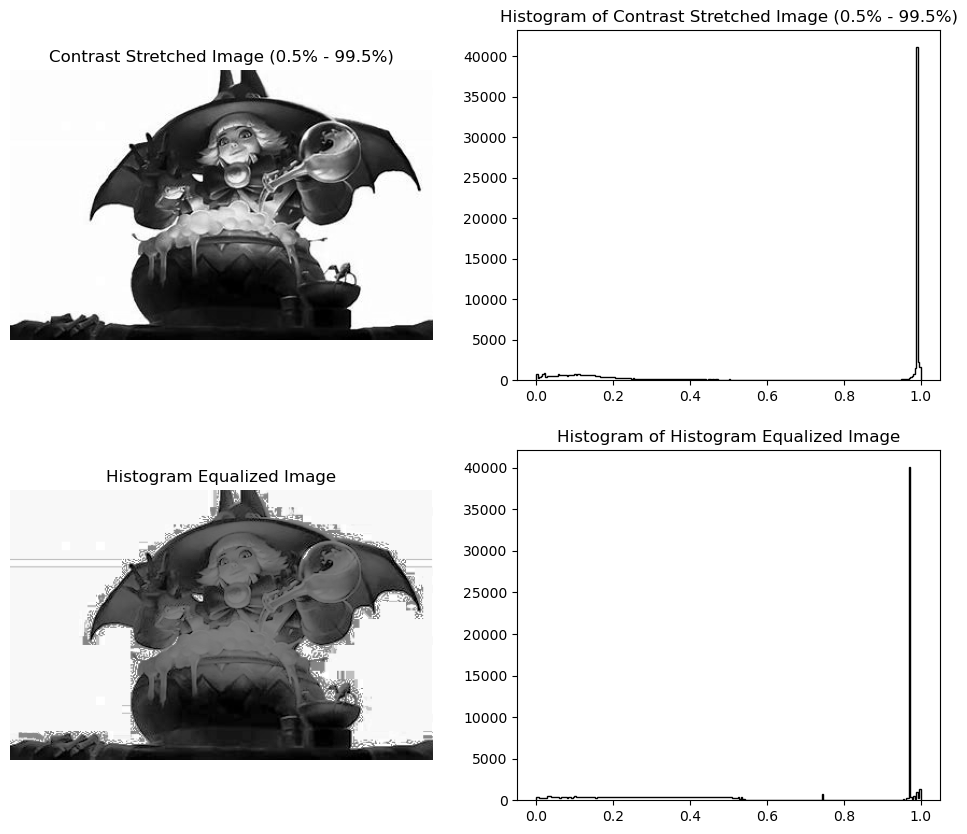

In [12]:
# Pemotongan persentil lebih ekstrem (0.5% dan 99.5%) dan normalisasi histogram (histogram equalization)
from skimage import exposure, io
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar yang diunggah
image_path = 'image1.jpeg'
image = io.imread(image_path, as_gray=True)  # Membaca gambar dalam greyscale

# Menampilkan citra asli
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Menampilkan histogram citra asli
ax[1].hist(image.ravel(), bins=256, histtype='step', color='black')
ax[1].set_title('Histogram of Original Image')

plt.show()

# Implementasi peregangan kontras dengan persentil yang lebih kecil (0.5% - 99.5%)
p05, p995 = np.percentile(image, (0.5, 99.5))  # Menentukan rmin dan rmax
image_rescale_extreme = exposure.rescale_intensity(image, in_range=(p05, p995))  # Peregangan kontras ekstrem

# Implementasi normalisasi histogram (histogram equalization)
image_eq = exposure.equalize_hist(image)  # Normalisasi histogram

# Menampilkan citra hasil peregangan kontras ekstrem dan normalisasi histogram
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Citra hasil peregangan kontras ekstrem
ax[0, 0].imshow(image_rescale_extreme, cmap='gray')
ax[0, 0].set_title('Contrast Stretched Image (0.5% - 99.5%)')
ax[0, 0].axis('off')

# Histogram hasil peregangan kontras ekstrem
ax[0, 1].hist(image_rescale_extreme.ravel(), bins=256, histtype='step', color='black')
ax[0, 1].set_title('Histogram of Contrast Stretched Image (0.5% - 99.5%)')

# Citra hasil normalisasi histogram
ax[1, 0].imshow(image_eq, cmap='gray')
ax[1, 0].set_title('Histogram Equalized Image')
ax[1, 0].axis('off')

# Histogram hasil normalisasi histogram
ax[1, 1].hist(image_eq.ravel(), bins=256, histtype='step', color='black')
ax[1, 1].set_title('Histogram of Histogram Equalized Image')

plt.show()


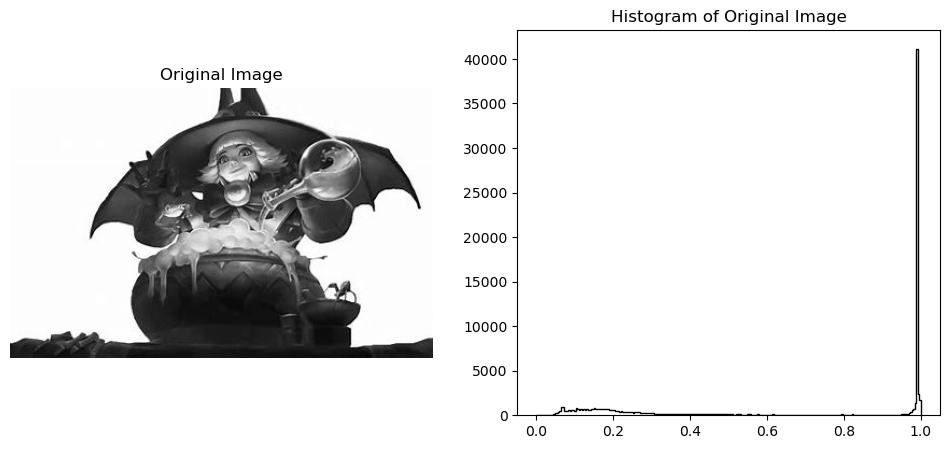

rmin: 87, rmax: 135


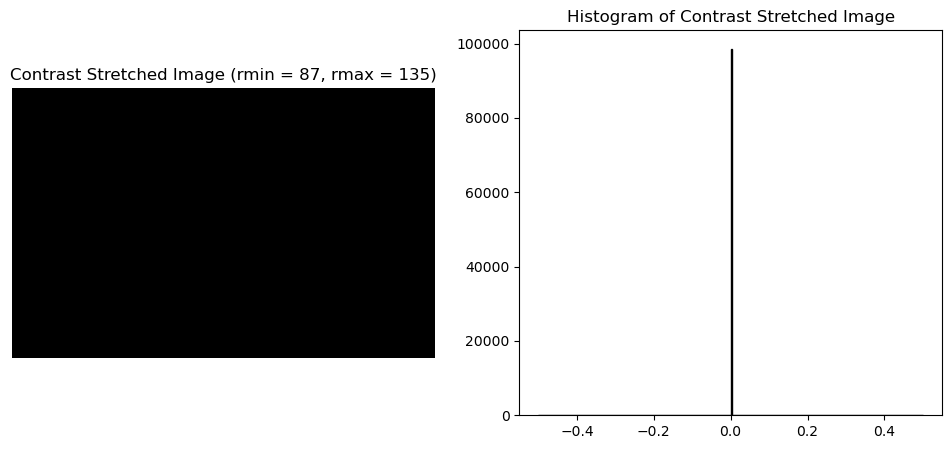

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Membaca gambar
image = io.imread('image1.jpeg', as_gray=True)  # Pastikan gambar dalam grayscale

# Menampilkan citra asli
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Menampilkan histogram citra asli
ax[1].hist(image.ravel(), bins=256, histtype='step', color='black')
ax[1].set_title('Histogram of Original Image')

plt.show()

# Menetapkan nilai rmin dan rmax secara manual
rmin = 87
rmax = 135
print(f"rmin: {rmin}, rmax: {rmax}")

# Transformasi linier menggunakan rumus:
# s = (r - rmin) * ((L-1)/(rmax - rmin))
L = 255  # Rentang kecerahan dari 0 hingga 255
image_rescale = (image - rmin) * ((L-1) / (rmax - rmin))  # Peregangan kontras

# Mengatur nilai yang berada di luar batas [0, 255] agar sesuai dengan rentang kecerahan
image_rescale = np.clip(image_rescale, 0, 255)

# Mengubah tipe data gambar menjadi uint8 untuk ditampilkan dengan benar
image_rescale = image_rescale.astype(np.uint8)

# Menampilkan citra hasil peregangan kontras
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(image_rescale, cmap='gray')
ax[0].set_title('Contrast Stretched Image (rmin = 87, rmax = 135)')
ax[0].axis('off')

# Menampilkan histogram citra hasil peregangan
ax[1].hist(image_rescale.ravel(), bins=256, histtype='step', color='black')
ax[1].set_title('Histogram of Contrast Stretched Image')

plt.show()
